In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
data.head(2)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes


In [4]:
data.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
l = LabelEncoder()
data['gender'] = l.fit_transform(data['gender'])

In [8]:
data['diabetes'] = l.fit_transform(data['diabetes'])

In [41]:
data.head(2)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,0,61,119,"22,5",118,70,32,38,"0,84",1
1,2,146,79,41,"3,6",19,0,60,135,"26,4",108,58,33,40,"0,83",1


In [9]:
corr = data.corr()

In [10]:
corr['diabetes']

patient_number   -0.317830
cholesterol      -0.204262
glucose          -0.689080
hdl_chol          0.123133
age              -0.301995
gender           -0.015531
height           -0.023466
weight           -0.162987
systolic_bp      -0.198600
diastolic_bp     -0.049351
waist            -0.223378
hip              -0.143792
diabetes          1.000000
Name: diabetes, dtype: float64

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

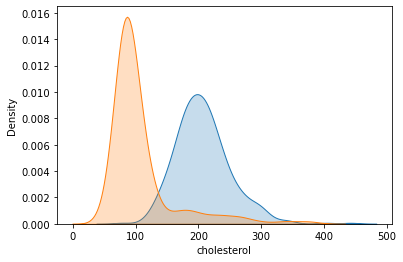

In [11]:
sns.kdeplot(x= data['cholesterol'],data = data,shade = True)
sns.kdeplot(x = data['glucose'],data = data,shade = True)

In [12]:
from scipy.stats import ttest_ind

In [13]:

stats,pvalue = ttest_ind(data['hdl_chol'],data['age'])
print(data['hdl_chol'].mean(),data['age'].mean())

if pvalue >0.05:
    print("same mean")
else:
    print('different mean')

50.266666666666666 46.774358974358975
different mean


In [14]:
stats,pvalue = ttest_ind(data['cholesterol'],data['glucose'])
print(data['cholesterol'].mean(),data['glucose'].mean())

if pvalue >0.05:
    print("same mean")
else:
    print('different mean')

207.23076923076923 107.33846153846154
different mean


In [15]:
x = data.iloc[:,:-1]

In [42]:
x

,patient_number,cholesterol,glucose,hdl_chol,age,gender,height,weight,systolic_bp,diastolic_bp,waist,hip
0,1,193,77,49,19,0,61,119,118,70,32,38
1,2,146,79,41,19,0,60,135,108,58,33,40
2,3,217,75,54,20,0,67,187,110,72,40,45
3,4,226,97,70,20,0,64,114,122,64,31,39
4,5,164,91,67,20,0,70,141,122,86,32,39
...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,83,0,59,125,150,90,35,40
386,387,226,279,52,84,0,60,192,144,88,41,48
387,388,301,90,118,89,0,61,115,218,90,31,41
388,389,232,184,114,91,0,61,127,170,82,35,38


In [16]:
y = data.iloc[:,-1]

In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
385    1
386    0
387    1
388    0
389    1
Name: diabetes, Length: 390, dtype: int32

In [17]:
x = x.drop('chol_hdl_ratio',axis = 1)

In [18]:
x = x.drop('bmi',axis = 1)

In [19]:
x = x.drop('waist_hip_ratio',axis =1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
model.score(xtrain,ytrain)

1.0

In [26]:
model.score(xtest,ytest)

0.9358974358974359

In [27]:
feature = model.feature_importances_

In [28]:
col = pd.DataFrame(x.columns)

In [29]:
col

,0
0,patient_number
1,cholesterol
2,glucose
3,hdl_chol
4,age
5,gender
6,height
7,weight
8,systolic_bp
9,diastolic_bp


In [30]:
feature

array([0.09217987, 0.05465404, 0.42180122, 0.0668251 , 0.06977614,
       0.00871234, 0.03307323, 0.048388  , 0.07455622, 0.04278673,
       0.04597686, 0.04127025])

In [31]:
feature = pd.DataFrame(feature)

In [32]:
feature = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(feature)],axis = 1)

In [33]:
feature.columns=['feature','importance']

In [44]:
feature

,feature,importance
0,patient_number,0.092180
1,cholesterol,0.054654
2,glucose,0.421801
3,hdl_chol,0.066825
4,age,0.069776
5,gender,0.008712
6,height,0.033073
7,weight,0.048388
8,systolic_bp,0.074556
9,diastolic_bp,0.042787


<AxesSubplot:xlabel='feature', ylabel='importance'>

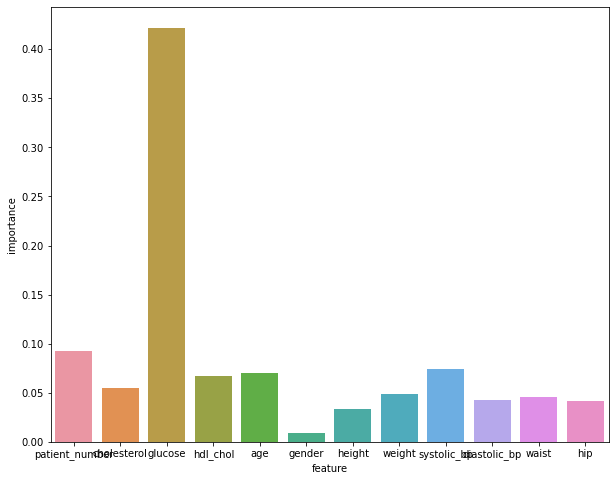

In [34]:
fig= plt.figure(figsize=(10,8))
sns.barplot(x= feature['feature'],y=feature['importance'])

In [35]:
x1 = x.drop('gender',axis =1)

In [45]:
x1

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
0,1,193,77,49,19,61,119,118,70,32,38
1,2,146,79,41,19,60,135,108,58,33,40
2,3,217,75,54,20,67,187,110,72,40,45
3,4,226,97,70,20,64,114,122,64,31,39
4,5,164,91,67,20,70,141,122,86,32,39
...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,83,59,125,150,90,35,40
386,387,226,279,52,84,60,192,144,88,41,48
387,388,301,90,118,89,61,115,218,90,31,41
388,389,232,184,114,91,61,127,170,82,35,38


In [36]:
x1train,x1test,y1train,y1test = train_test_split(x1,y,test_size = 0.20)

In [37]:
model2 = RandomForestClassifier()

In [38]:
model2.fit(x1train,y1train)

RandomForestClassifier()

In [39]:
model2.score(x1train,y1train)

1.0

In [40]:
model2.score(x1test,y1test)

0.8974358974358975